In [28]:
## for data
import pandas as pd
import numpy as np

## for statistical test
import scipy

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import matplotlib.pyplot as plt
# import time
# start_time = time.time()
# # main()
# print("--- %s seconds ---" % (time.time() - start_time))

In [15]:
## get time of a python program's execution

import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%Y-%m-%d %H:%M:%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    print(line)
    print(secondsToStr(), '-', s)
    if elapsed:
        print("Elapsed time:", elapsed)
    print(line)
    print()

def endlog():
    end = time()
    elapsed = end-start
    log("End Program", secondsToStr(elapsed))

start = time()
atexit.register(endlog)
log("Start Program")

2023-02-15 19:02:51 - Start Program



In [16]:
input_dict = pd.read_pickle("./input/gestures_4d_full.pkl")

In [17]:
print("type of input_dict:", type(input_dict))
print("keys:", input_dict.keys())

type of input_dict: <class 'dict'>
keys: dict_keys(['labels', 'data'])


In [18]:
print(type(input_dict['labels']))
print(type(input_dict['data']))

<class 'list'>
<class 'numpy.ndarray'>


In [19]:
print("shape of ndarray:", input_dict['data'].shape)

shape of ndarray: (7420, 120, 67, 3)


In [20]:
# defineing labels id's of left, right and both side

lefthand_idx = [2,5,8,18,20,23,26,29,31,33,35,37,39,41,44,52]
righthand_idx = [1,4,7,9,17,19,22,25,28,30,32,34,36,38,40,43]
bothhand_idx = [0,3,6,10,11,12,13,14,15,16,21,24,27,42,45,46,47,48,49,50,51]

labels = np.array(input_dict['labels'])
data = input_dict['data']

In [21]:
# creating mask for left right and both hands
# to filter the idx for each hands respectively 


mask = np.zeros_like(labels, dtype=bool)        # initialize mask with zeros
for id in lefthand_idx:
    maskid = labels == id
    mask = mask + maskid

lefthand_data = data[mask]
lefthand_labels = labels[mask]


mask = np.zeros_like(labels, dtype=bool)        # reset mask
for id in righthand_idx:
    maskid = labels == id
    mask = mask + maskid

righthand_data = data[mask]
righthand_labels = labels[mask]


mask = np.zeros_like(labels, dtype=bool)        # reset mask
for id in bothhand_idx:
    maskid = labels == id
    mask = mask + maskid

bothhand_data  = data[mask]
bothhand_labels = labels[mask]


In [22]:
print("lefthand_data shape:", lefthand_data.shape)
print("righthand_data shape:", righthand_data.shape)
print("bothhand_data shape:", bothhand_data.shape)

print("sum_data shape:", lefthand_data.shape[0] + righthand_data.shape[0] + bothhand_data.shape[0])

print("lefthand_labels shape:", lefthand_labels.shape)
print("righthand_labels shape:", righthand_labels.shape)
print("bothhand_labels shape:", bothhand_labels.shape)

lefthand_data shape: (2053, 120, 67, 3)
righthand_data shape: (2021, 120, 67, 3)
bothhand_data shape: (3346, 120, 67, 3)
sum_data shape: 7420
lefthand_labels shape: (2053,)
righthand_labels shape: (2021,)
bothhand_labels shape: (3346,)


In [23]:
# Defining labels into three-target-classes
# lefthand_labels = -1
# righthand_labels = 1
# bothhand_labels = 0

lefthand_target = np.ones_like(lefthand_labels) * -1
righthand_target = np.ones_like(righthand_labels)
bothhand_target = np.zeros_like(bothhand_labels)

print(lefthand_target.shape)
print(righthand_target.shape)
print(bothhand_target.shape)

(2053,)
(2021,)
(3346,)


In [25]:
all_labels = np.concatenate((lefthand_target, righthand_target, bothhand_target), axis=0)

all_data = np.concatenate((lefthand_data, righthand_data, bothhand_data), axis=0)

print(all_labels.shape)
print(all_data.shape)

(7420,)
(7420, 120, 67, 3)


numpy array to display an image

In [26]:
img = all_data.reshape(7420, 120, -1)
img = img - np.mean(img[:, 0:5, :] , axis=1, keepdims=True)
img = np.sum(img**2, axis=-1, keepdims=True) 
img.shape

(7420, 120, 1)

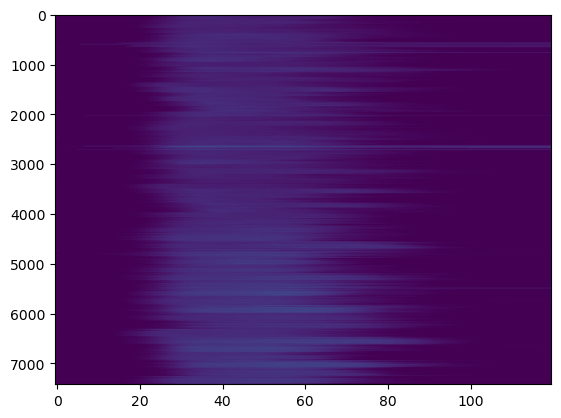

In [29]:
plt.imshow(img, aspect='auto')

In [30]:
from sklearn.model_selection import train_test_split

## split the data into tain test set: cross validation
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.30, random_state=21)

In [31]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(5194, 120, 67, 3)
(2226, 120, 67, 3)
(5194,)
(2226,)


In [32]:
## classification model take 2d array as input
## Reshape the 4-dimensional numpy array into a 2-dimensional numpy array

train_2d = train_data.reshape(train_data.shape[0], -1)
print("train data reshape dim:", train_2d.shape)

## Reshape the 4-d numpy-array into a 2-d numpy-array
test_2d = test_data.reshape(test_data.shape[0],-1)
print("test data reshape dim:", test_2d.shape)

train data reshape dim: (5194, 24120)
test data reshape dim: (2226, 24120)


### sklearn.linear_model.LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

## initlize our classifier objects
logi_reg = LogisticRegression(max_iter=500)

## train and fit our classifier
logi_reg_model_all = logi_reg.fit(train_2d, train_labels)       # logistic-regression_model_all-data TRAIN MODEL   

c:\Users\tomar\scoop\apps\miniconda3\current\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Make predictions on the test data
pred = logi_reg.predict(test_2d)        # make prediction on test data using logistic_regression classifier

print(pred.shape)
# Print the accuracy score of the model
# print("Accuracy:", clf.score(X_test, y_test))


(2226,)


In [36]:
print(pred)

[ 1  0 -1 ...  0  0  0]


In [37]:
## write a plotting function for confusion matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

score = accuracy_score(test_labels, pred)
print("accuracy:   %0.4f" % score)

cm10 = confusion_matrix(test_labels, pred)


accuracy:   0.9978


In [39]:
test_2d

array([[ 0.47976515,  0.55096269, -0.43714127, ...,  0.39626828,
         0.93067837,  0.0030378 ],
       [ 0.49418062,  0.45898515, -0.45465699, ...,  0.39873394,
         0.91889912,  0.00818518],
       [ 0.48482421,  0.50718737, -0.46438169, ...,  0.37836441,
         0.86489815,  0.01177873],
       ...,
       [ 0.4811922 ,  0.47742572, -0.46693605, ...,  0.43883634,
         0.86790234, -0.0020525 ],
       [ 0.49780667,  0.52006173, -0.50519007, ...,  0.42803875,
         0.90188402,  0.0126512 ],
       [ 0.49960908,  0.41325918, -0.37839001, ...,  0.50275087,
         0.84389693, -0.00308662]])

Confusion matrix, without normalization


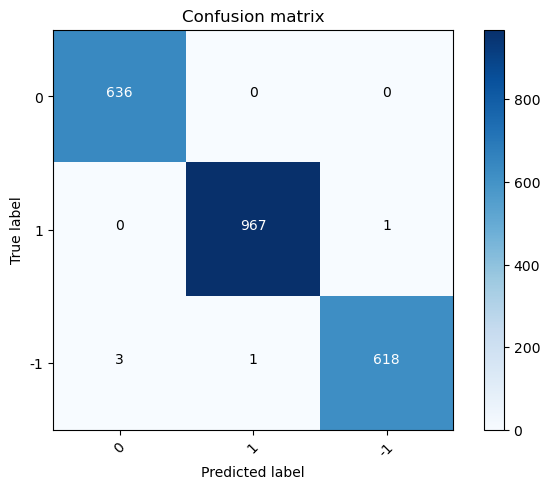

In [40]:
plot_confusion_matrix(cm10, classes=['0', '1', '-1'])

TSNE for reducing dimention 

In [41]:
from sklearn.manifold import TSNE

# Load the data

## Define the t-SNE model
## n_components=3: This sets the number of dimensions of the output data to 3
## learning_rate=200: controls tradeoff between the accuracy and speed of the optimization algorithm
## perplexity=30: controls balance between local and global aspects of the data
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200)

# Fit the model to the data
train_tsne = tsne.fit_transform(train_2d)
test_tsne = tsne.fit_transform(test_2d)


In [42]:
print(train_tsne.shape)
print(test_tsne.shape)

(5194, 3)
(2226, 3)


In [43]:
from sklearn.linear_model import LogisticRegression

## initlize our classifier objects
logi_reg = LogisticRegression()

## train and fit our classifier
logi_reg_model_all = logi_reg.fit(train_tsne, train_labels)

In [44]:
## Make predictions
pred2 = logi_reg.predict(test_tsne)       # make prediction on test data using naive_bayes classifier

print(pred2.shape)

(2226,)


In [45]:
pred2

array([ 1,  0, -1, ...,  0,  0,  0])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

score = accuracy_score(test_labels, pred2)
print("accuracy:   %0.4f" % score)

cm11 = confusion_matrix(test_labels, pred2)


accuracy:   0.9789


Confusion matrix, without normalization


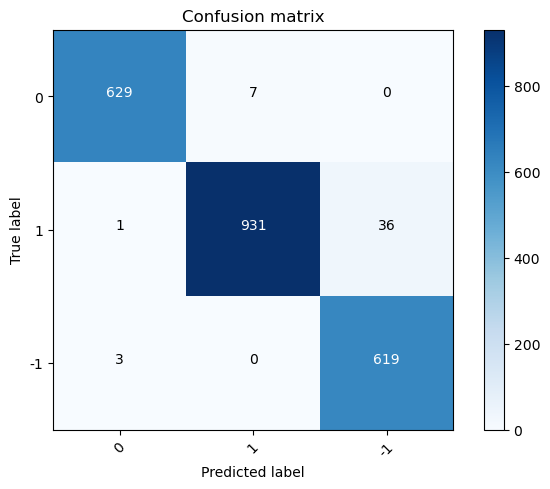

In [47]:
plot_confusion_matrix(cm11, classes=[0,1,-1])

## Logistic Regression on single hand with multi-label clases

### LogReg on Left hand 

In [48]:
## split the data into tain test set: cross validation
lefthand_train_data, lefthand_test_data, lefthand_train_labels, lefthand_test_labels = train_test_split(lefthand_data, lefthand_labels, train_size=0.30, random_state=22)

In [49]:
print(lefthand_train_data.shape)
print(lefthand_test_data.shape)
print(lefthand_train_labels.shape)
print(lefthand_test_labels.shape)

(615, 120, 67, 3)
(1438, 120, 67, 3)
(615,)
(1438,)


In [50]:
## classification model take 2d array as input
## Reshape the 4-dimensional numpy array into a 2-dimensional numpy array

lefthand_train_2d = lefthand_train_data.reshape(lefthand_train_data.shape[0], -1)
print("train data reshape dim:", lefthand_train_2d.shape)

## Reshape the 4-d numpy-array into a 2-d numpy-array
lefthand_test_2d = lefthand_test_data.reshape(lefthand_test_data.shape[0],-1)
print("test data reshape dim:", lefthand_test_2d.shape)

train data reshape dim: (615, 24120)
test data reshape dim: (1438, 24120)


In [51]:
## initlize our classifier objects
logreg = LogisticRegression(max_iter=5000)

## train and fit our classifier
logreg_model_lh = logreg.fit(lefthand_train_2d, lefthand_train_labels)       # logistic-regression_model_lefthand-data TRAIN MODEL   

In [52]:
pred = logreg.predict(lefthand_test_2d) 

print(pred.shape)

(1438,)


In [53]:
score = accuracy_score(lefthand_test_labels, pred)
print("accuracy:   %0.4f" % score)

cm20 = confusion_matrix(lefthand_test_labels, pred)

accuracy:   0.8693


Confusion matrix, without normalization


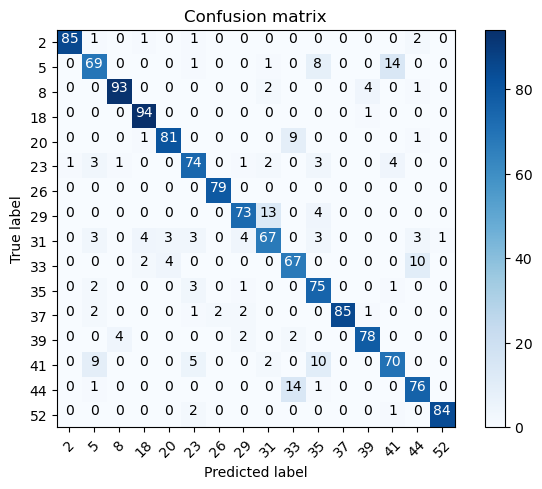

In [54]:
plot_confusion_matrix(cm20, classes=['2','5','8','18','20','23','26','29','31','33','35','37','39','41','44','52'])

### LogReg on Right hand

In [55]:
## split the data into tain test set: cross validation
righthand_train_data, righthand_test_data, righthand_train_labels, righthand_test_labels = train_test_split(righthand_data, righthand_labels, train_size=0.30, random_state=22)

In [56]:
print(righthand_train_data.shape)
print(righthand_test_data.shape)
print(righthand_train_labels.shape)
print(righthand_test_labels.shape)

(606, 120, 67, 3)
(1415, 120, 67, 3)
(606,)
(1415,)


In [57]:
## classification model take 2d array as input
## Reshape the 4-dimensional numpy array into a 2-dimensional numpy array

righthand_train_2d = righthand_train_data.reshape(righthand_train_data.shape[0], -1)
print("train data reshape dim:", lefthand_train_2d.shape)

## Reshape the 4-d numpy-array into a 2-d numpy-array
righthand_test_2d = righthand_test_data.reshape(righthand_test_data.shape[0],-1)
print("test data reshape dim:", righthand_test_2d.shape)

train data reshape dim: (615, 24120)
test data reshape dim: (1415, 24120)


In [58]:
## initlize our classifier objects
logreg = LogisticRegression(max_iter=5000)

## train and fit our classifier
logreg_model_rh = logreg.fit(righthand_train_2d, righthand_train_labels)       # logistic-regression_model_righthand-data TRAIN MODEL   

In [59]:
pred = logreg.predict(righthand_test_2d) 

print(pred.shape)

(1415,)


In [60]:
score = accuracy_score(righthand_test_labels, pred)
print("accuracy:   %0.4f" % score)

cm21 = confusion_matrix(righthand_test_labels, pred)

accuracy:   0.8233


Confusion matrix, without normalization


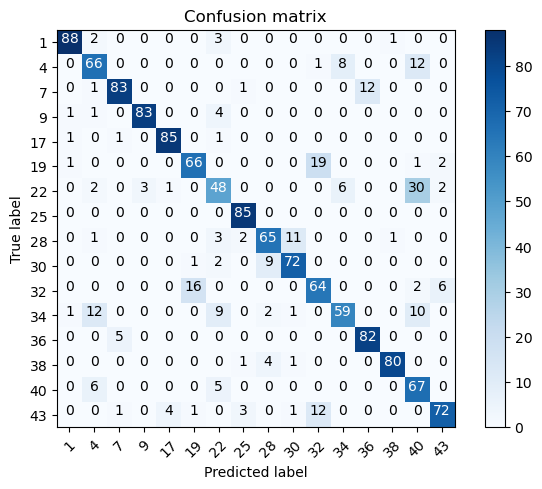

In [62]:
plot_confusion_matrix(cm21, classes=['1','4','7','9','17','19','22','25','28','30','32','34','36','38','40','43'])

### LogReg for both hands data

In [63]:
## split the data into tain test set: cross validation
bothhand_train_data, bothhand_test_data, bothhand_train_labels, bothhand_test_labels = train_test_split(bothhand_data, bothhand_labels, train_size=0.30, random_state=22)

In [64]:
print(bothhand_train_data.shape)
print(bothhand_test_data.shape)
print(bothhand_train_labels.shape)
print(bothhand_test_labels.shape)

(1003, 120, 67, 3)
(2343, 120, 67, 3)
(1003,)
(2343,)


In [65]:
## classification model take 2d array as input
## Reshape the 4-dimensional numpy array into a 2-dimensional numpy array

bothhand_train_2d = bothhand_train_data.reshape(bothhand_train_data.shape[0], -1)
print("train data reshape dim:", bothhand_train_2d.shape)

## Reshape the 4-d numpy-array into a 2-d numpy-array
bothhand_test_2d = bothhand_test_data.reshape(bothhand_test_data.shape[0],-1)
print("test data reshape dim:", bothhand_test_2d.shape)

train data reshape dim: (1003, 24120)
test data reshape dim: (2343, 24120)


In [66]:
## initlize our classifier objects
logreg = LogisticRegression(max_iter=5000)

## train and fit our classifier
logreg_model_bh = logreg.fit(bothhand_train_2d, bothhand_train_labels)       # logistic-regression_model_bothhand-data TRAIN MODEL   

In [67]:
pred = logreg.predict(bothhand_test_2d) 

print(pred.shape)

(2343,)


In [68]:
score = accuracy_score(bothhand_test_labels, pred)
print("accuracy:   %0.4f" % score)

cm22 = confusion_matrix(bothhand_test_labels, pred)

accuracy:   0.9385


Confusion matrix, without normalization


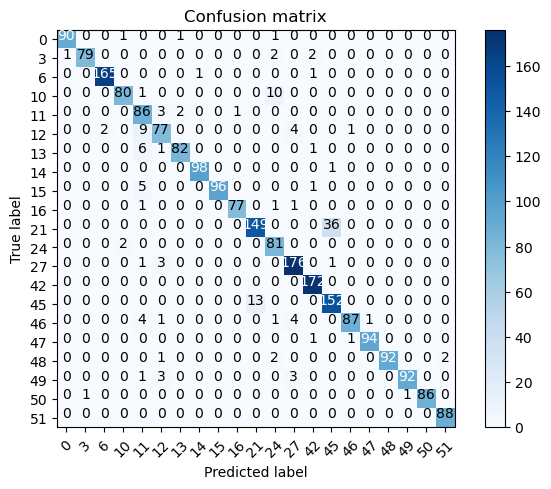

In [69]:
plot_confusion_matrix(cm22, classes=['0','3','6','10','11','12','13','14','15','16','21','24','27','42','45','46','47','48','49','50','51'])